# Trabajo Práctico 1
##### Daniel Caicedo - Ignacio Chiapella - Miguel Guerrero - Juan Knebel

In [1]:
# Para visuzalización en notebook
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (8,6)
mpl.rcParams['font.size'] = 22
from IPython.display import Audio, Markdown, Image
import seaborn as sns
import matplotlib.cm as cm

# Números y Datos
import numpy as np
import pandas as pd

# Archivos
import urllib.request
import glob

# Machine learning
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

# Clustering (scipy)
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster

# Clustering (sklearn)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

from sklearn.cluster import KMeans, DBSCAN
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import adjusted_rand_score, silhouette_score, silhouette_samples
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import euclidean_distances

# Analisis de PCA
from sklearn.decomposition import PCA

# Distancia de Gower
from funciones import gower_distances
from funciones import cluster

In [53]:
metadata = pd.read_csv("D:/DC_JH/Daniel_Data/GitHub/DMCyT/data/audio_features/metadata.csv", index_col='id')
audio_features = pd.read_csv("D:/DC_JH/Daniel_Data/GitHub/DMCyT/data/audio_features/audio_features-reduce.csv", index_col='id')
metadata = metadata.loc[:,['album','artists','name','popularity','genre']]
audio_with_genre = pd.concat([audio_features,metadata.genre],axis=1)

audio_with_genre.head()

(2206, 10)

# Clustering - PAM

For n_clusters = 2 The average silhouette_score is : 0.5985589893752628
For n_clusters = 3 The average silhouette_score is : 0.5689552534692909
For n_clusters = 4 The average silhouette_score is : 0.49849838557654014
For n_clusters = 5 The average silhouette_score is : 0.47295738434050993
For n_clusters = 6 The average silhouette_score is : 0.4413225766604276
For n_clusters = 8 The average silhouette_score is : 0.39911869398929767
For n_clusters = 10 The average silhouette_score is : 0.2824609721868065


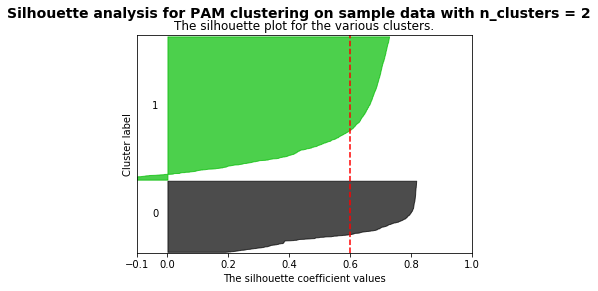

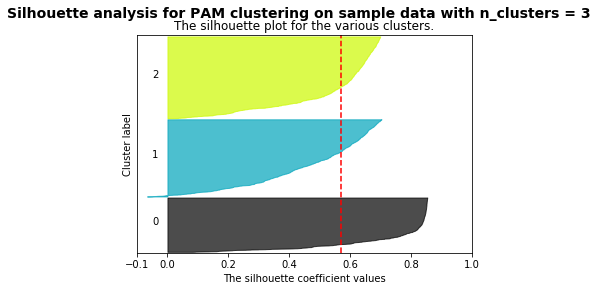

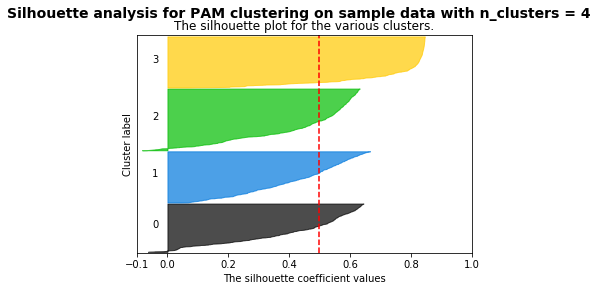

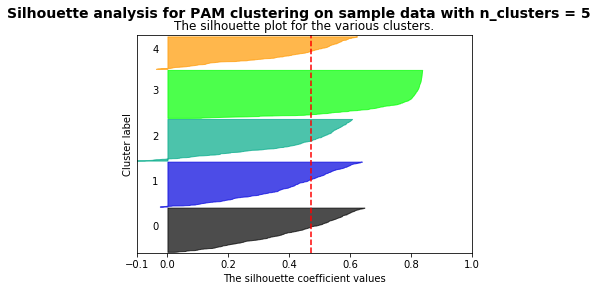

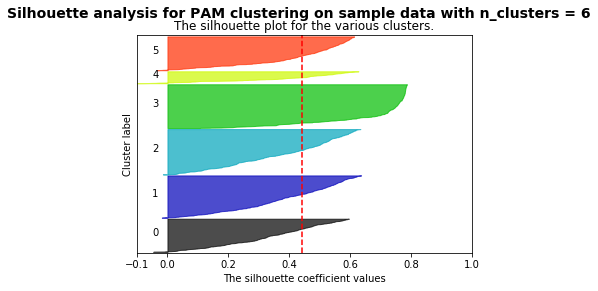

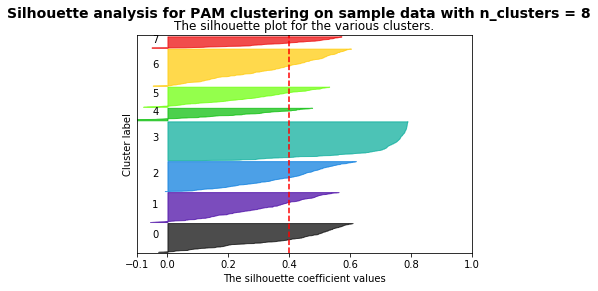

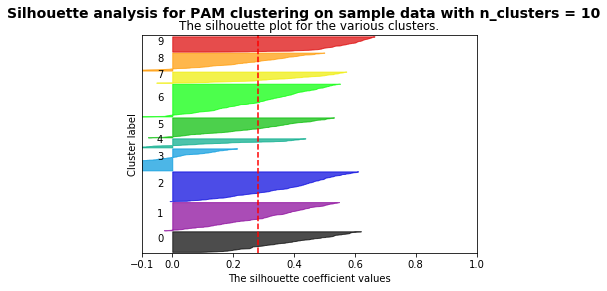

In [3]:
## Algoritmo PAM con solo 4 features
np.random.seed(139573)

X = audio_with_genre.drop(["genre"], axis=1)
#X = audio_with_genre.loc[:,['danceability', 'energy','instrumentalness', 'speechiness']]
y = audio_with_genre.loc[:,["genre"]]

range_n_clusters = [2, 3, 4, 5, 6,8,10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1)
    #fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    
    clusterer = KMedoids(n_clusters=n_clusters, metric='euclidean', init='random', max_iter=3000, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # Labeling the clusters
    centers = clusterer.cluster_centers_

    plt.suptitle(("Silhouette analysis for PAM clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

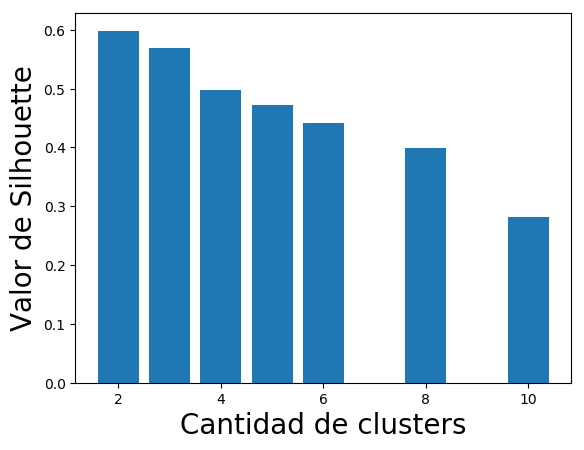

In [59]:
# Graficar valores de silhouette

k = [2, 3, 4, 5, 6, 8, 10]
  
ac2 = KMedoids(n_clusters=2, metric='euclidean', init='random', max_iter=3000, random_state=10)
ac3 = KMedoids(n_clusters=3, metric='euclidean', init='random', max_iter=3000, random_state=10)
ac4 = KMedoids(n_clusters=4, metric='euclidean', init='random', max_iter=3000, random_state=10)
ac5 = KMedoids(n_clusters=5, metric='euclidean', init='random', max_iter=3000, random_state=10)
ac6 = KMedoids(n_clusters=6, metric='euclidean', init='random', max_iter=3000, random_state=10)
ac8 = KMedoids(n_clusters=8, metric='euclidean', init='random', max_iter=3000, random_state=10)
ac10 = KMedoids(n_clusters=10, metric='euclidean', init='random', max_iter=3000, random_state=10)
    
# Appending the silhouette scores of the different models to the list 
silhouette_scores = [] 
silhouette_scores.append( 
        silhouette_score(X, ac2.fit_predict(X))) 
silhouette_scores.append( 
        silhouette_score(X, ac3.fit_predict(X))) 
silhouette_scores.append( 
        silhouette_score(X, ac4.fit_predict(X))) 
silhouette_scores.append( 
        silhouette_score(X, ac5.fit_predict(X))) 
silhouette_scores.append( 
        silhouette_score(X, ac6.fit_predict(X))) 
silhouette_scores.append( 
        silhouette_score(X, ac8.fit_predict(X))) 
silhouette_scores.append( 
        silhouette_score(X, ac10.fit_predict(X))) 



# Plotting a bar graph to compare the results 
plt.bar(k, silhouette_scores) 
plt.xlabel('Cantidad de clusters', fontsize = 20) 
plt.ylabel('Valor de Silhouette', fontsize = 20) 
plt.show()

### Algortimo PAM

Para la elaboración de los clusters con el algortimo PAM se determinó el nro de clusters óptimo a traves del coeficiente de silhouette realizando ejecuciones con diferentes n, los resultados se observan a continuacion:

For n_clusters = 2 The average silhouette_score is : 0.5985589893752628
For n_clusters = 3 The average silhouette_score is : 0.5689552534692909
For n_clusters = 4 The average silhouette_score is : 0.49849838557654014
For n_clusters = 5 The average silhouette_score is : 0.47295738434050993
For n_clusters = 6 The average silhouette_score is : 0.4413225766604276
For n_clusters = 8 The average silhouette_score is : 0.39911869398929767
For n_clusters = 10 The average silhouette_score is : 0.2824609721868065

Se utilizó el n = 3 debido a que presentaba un coeficiente cercano al n=2 y para observar más cantidad de agrupaciones.

Importante acotar que para las ejecuciones se utilizaron las variables con sus escalas originales, no se aplica normalización ni estandarización.


In [5]:
clusterer = KMedoids(n_clusters=3, metric='euclidean', init='random', max_iter=3000, random_state=10)
cluster_labels = clusterer.fit_predict(X)

## Silhuette usando sklearn
silhouette_avg = silhouette_score(X, clusterer.labels_)
print("Coef silhouette para Cluster k=3 :",silhouette_avg)

Coef silhouette para Cluster k=3 : 0.5689552534692909


In [6]:
df_temp = pd.DataFrame({'Genero': audio_with_genre.genre, 'Clusters': clusterer.labels_})
cross_tab = pd.crosstab(df_temp['Genero'], df_temp['Clusters'])
cross_tab

Clusters,0,1,2
Genero,,,
ambient,55,184,221
classical,32,120,253
drum-and-bass,359,53,39
jazz,56,213,158
world-music,60,228,175


In [7]:
## Silhuette por Cluster
silhouette_values = pd.DataFrame({'Clusters': clusterer.labels_,'silho_v': silhouette_samples(X, clusterer.labels_)})
silhouette_values.groupby('Clusters').agg({'silho_v':'mean'})

,silho_v
Clusters,
0,0.745832
1,0.472737
2,0.542215


Observando el resultado de los agrupamientos vemos un alto coeficiente en el clusters 0 con 0.74 lo que indica que el grupo es bastante homogéneo, si validamos la tabla cruzada con las etiquetas de los generos musicales se observa que el cluster 0 presenta la mayor concentración del genero drum-and-bass.


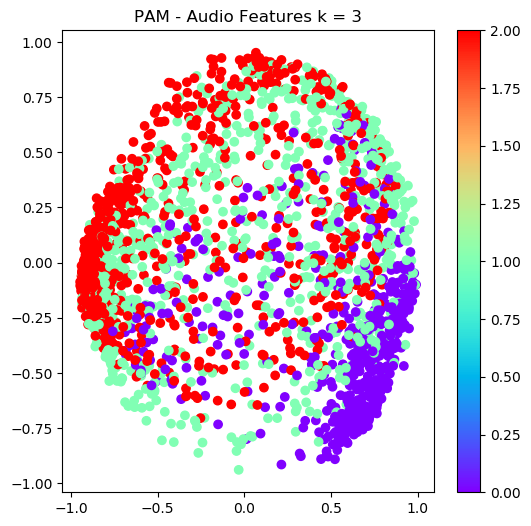

In [60]:
## Análisis de Componentes Principales

from sklearn.preprocessing import StandardScaler, normalize 

# Scaling the data so that all the features become comparable 
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X) 
  
# Normalizing the data so that the data approximately  
# follows a Gaussian distribution 
X_normalized = normalize(X_scaled)


# Converting the numpy array into a pandas DataFrame 
X_normalized = pd.DataFrame(X_normalized) 


pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(X_normalized) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 


#ac3 = KMedoids(n_clusters=3, metric='euclidean', init='random', max_iter=3000, random_state=10) 
    
# Visualizing the clustering
#plt.style.use("default")
plt.figure(figsize =(6, 6)) 
plt.scatter(x=X_principal['P1'], y=X_principal['P2'],  
           c = cluster_labels, cmap ='rainbow') 
plt.colorbar()
plt.title("PAM - Audio Features k = 3")
#plt.legend(ac3.labels_)
plt.show() 

In [45]:
## Indice RAND

ari0 = adjusted_rand_score(df_temp['Genero'], df_temp['Clusters'])
print("Índice Rand para Algoritmo PAM con 3 clusters:", ari0)


Índice Rand para Algoritmo PAM con 3 clusters: 0.12406647257841315


In [47]:
def vanDongen(ct):
    n2=2*(sum(ct.apply(sum,axis=1)))
    sumi = sum(ct.apply(np.max,axis=1))
    sumj = sum(ct.apply(np.max,axis=0))
    maxsumi = np.max(ct.apply(sum,axis=1))
    maxsumj = np.max(ct.apply(sum,axis=0))
    vd = (n2 - sumi - sumj)/(n2 - maxsumi - maxsumj)
    return vd

print("Índice VanDongen para Algoritmo PAM con 3 clusters:", vanDongen(cross_tab))

Índice VanDongen para Algoritmo PAM con 3 clusters: 0.7405736384144377
